In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.linalg import toeplitz

In [155]:
data = pd.read_excel('Input (1).xlsx',  sheet_name='Russia', header=0, na_values='')
data = pd.melt(data, id_vars=['Date', 'Variable'], var_name='RIC', value_name='value')
data = data.pivot_table('value', ['Date', 'RIC'], 'Variable')
data = data.reset_index()
data

Variable,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165","4,432,129,558.543",0.892,1.117,6.763,28.347,12.252,"19,614,434,836.891","42,011,040,000.000",0.051
1,2010,AFLT.MM,1.095,"1,127,600,000.000","677,680,132.618",0.280,"4,102,450,116.021","93,796,201,601.000","2,907,075,677.683","276,555,477.071","477,912,500.065",2.618,2.480,5.934,26.567,28.149,"4,290,682,730.178","4,525,900,000.000",0.136
2,2010,AKRN.MM,29.191,"1,270,985,615.783","225,688,693.874",5.422,"2,178,683,857.346","18,968,000,000.000","1,772,736,629.308","233,626,142.325","177,310,877.239",37.174,47.792,9.808,23.260,11.917,"1,238,549,470.489","2,802,011,810.894",0.145
3,2010,AMEZ.MM,0.825,"411,049,256.046","35,968,064.399",0.076,"175,896,790.043","883,806,000.000","283,323,252.108","37,738,840.685","41,329,583.320",0.568,0.487,6.607,9.623,8.141,"336,694,335.390","596,394,246.313",-0.012
4,2010,APTK.MM,6.765,"64,267,097.753","34,789,350.401",-1.112,"348,813,467.058","8,460,000,000.000","320,321,473.332","-11,857,081.588","29,035,663.620",3.372,3.202,0.148,-32.369,-1.559,"694,846,755.303","550,460,228.960",0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2019,URKA.MM,1.652,"2,097,285,005.758","1,629,900,951.403",1.014,nan,"133,410,000,000.000","7,820,300,661.779","1,263,778,058.790","1,314,489,390.188",1.848,1.717,13.815,85.552,19.521,"2,910,846,572.382","9,200,311,374.035",0.138
576,2019,UTAR.MM,-0.125,"-452,737,169.920","157,756,673.364",-0.082,"1,658,593,702.067","47,831,973,000.000","422,259,676.384","-314,682,405.281","63,363,762.916",0.114,0.100,-28.241,nan,nan,"1,199,973,737.084","1,122,263,777.268",-0.166
577,2019,VLHZ.MM,1.042,"5,215,025.832","911,280.138",-0.059,"11,813,280.425","251,375,000.000","4,481,763.555","-294,015.499","610,318.599",0.895,0.684,-1.726,-5.313,nan,"33,532,448.335","16,264,222.158",-0.244
578,2019,VSMO.MM,224.653,"2,588,851,262.916","611,279,965.557",20.868,"3,277,431,084.960","30,451,094,000.000","3,783,225,562.134","222,007,103.904","380,091,834.099",328.133,262.793,4.870,8.750,8.244,"1,455,254,936.854","4,774,081,946.039",0.155


In [156]:
# удаление пропусков

delete = pd.DataFrame()

for i in range(len(data)):
    if (math.isnan(data['Market Cap'][i]) or
        math.isnan(data['Net Income'][i]) or
        # data['Market Cap'][i] <= 5000000 or
        math.isnan(data['Common Shareholder Equity'][i]) or
        math.isnan(data['Total Assets Growth, %'][i])):
        delete = delete.append(data.take([i]))
                               
delete = pd.unique(delete['RIC'])
delete = pd.DataFrame(delete)
delete = delete.rename(columns={0: 'RIC'})

data = pd.merge(data, delete, how='outer', on='RIC', indicator=True)
data = data[data['_merge'] == 'left_only']
del data['_merge']
data = data.reset_index()
del data['index']
data

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165","4,432,129,558.543",0.892,1.117,6.763,28.347,12.252,"19,614,434,836.891","42,011,040,000.000",0.051
1,2011,AFKS.MM,0.907,"8,420,065,000.000","6,863,366,966.461",0.053,"30,619,030,486.979","576,837,938,680.000","7,044,014,412.623","912,610,226.711","4,274,136,090.148",0.730,0.768,4.157,7.827,8.319,"26,633,682,172.282","44,166,048,000.000",-0.006
2,2012,AFKS.MM,0.867,"8,038,755,000.000","7,483,016,481.331",0.051,"29,003,937,707.492","633,661,301,086.000","8,103,766,933.741","199,054,136.174","3,599,524,098.279",0.840,0.858,2.052,-0.057,4.905,"30,077,786,518.730","43,916,497,000.000",0.017
3,2013,AFKS.MM,0.987,"9,172,189,000.000","8,646,664,645.794",0.256,"25,898,019,234.773","320,843,387,385.000","13,178,478,890.413","961,666,028.312","4,803,350,739.121",1.366,1.342,5.759,21.450,5.246,"34,507,567,949.235","44,642,188,000.000",-0.031
4,2014,AFKS.MM,1.115,"10,306,701,000.000","5,484,188,622.599",0.040,"25,784,502,591.973","319,349,000,000.000","1,989,690,721.649","2,186,729,547.005","3,454,720,550.076",0.206,0.359,3.839,7.378,8.936,"17,921,743,286.470","43,248,994,000.000",-0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,VLHZ.MM,1.112,"5,568,556.515","457,267.387",-0.179,"19,335,070.891","299,958,000.000","8,889,796.378","-895,153.927","-264,268.610",1.776,1.992,-4.497,-14.386,nan,"40,443,726.635","19,840,353.507",-0.437
486,2016,VLHZ.MM,1.058,"5,293,853.967","2,606,035.682",0.162,"14,512,989.123","289,423,000.000","9,168,063.445","809,642.287","2,121,878.834",1.804,1.349,5.281,16.651,13.963,"33,910,540.854","14,876,044.387",-0.250
487,2017,VLHZ.MM,1.314,"6,577,020.388","2,750,289.734",0.206,"17,527,935.377","277,579,000.000","7,813,457.920","1,033,494.932","2,466,349.999",1.561,1.370,5.631,16.047,14.319,"40,758,875.667","18,994,319.573",0.277
488,2018,VLHZ.MM,1.413,"7,074,326.844","2,465,542.210",0.166,"16,338,410.441","183,927,000.000","4,160,744.341","829,709.925","2,146,936.652",0.831,0.848,3.980,11.800,10.147,"45,629,952.738","21,507,921.779",0.132


In [157]:
data.dtypes

Date                           int64
RIC                           object
BPS                          float64
Common Shareholder Equity    float64
EBITDA                       float64
EPS                          float64
EV                           float64
Gross Margin                 float64
Market Cap                   float64
Net Income                   float64
Operating Profit             float64
P_endyear                    float64
P_nextjune                   float64
ROA                          float64
ROE                          float64
ROIC                         float64
Revenue                      float64
Total Assets                 float64
Total Assets Growth, %       float64
dtype: object

In [158]:
data['EV/EBITDA'] = data['EV'] / data['EBITDA']
data['P/E'] = data['P_endyear'] / data['EPS']
data['P/B'] = data['P_endyear'] / data['BPS']
data['BM'] = data['Common Shareholder Equity'] / data['Market Cap']
data['GM/A'] = data['Gross Margin'] / data['Total Assets']

data.head()

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,...,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165",...,28.347,12.252,"19,614,434,836.891","42,011,040,000.000",0.051,6.225,20.032,1.218,0.789,11.364
1,2011,AFKS.MM,0.907,"8,420,065,000.000","6,863,366,966.461",0.053,"30,619,030,486.979","576,837,938,680.000","7,044,014,412.623","912,610,226.711",...,7.827,8.319,"26,633,682,172.282","44,166,048,000.000",-0.006,4.461,13.802,0.805,1.195,13.061
2,2012,AFKS.MM,0.867,"8,038,755,000.000","7,483,016,481.331",0.051,"29,003,937,707.492","633,661,301,086.000","8,103,766,933.741","199,054,136.174",...,-0.057,4.905,"30,077,786,518.730","43,916,497,000.000",0.017,3.876,16.547,0.968,0.992,14.429
3,2013,AFKS.MM,0.987,"9,172,189,000.000","8,646,664,645.794",0.256,"25,898,019,234.773","320,843,387,385.000","13,178,478,890.413","961,666,028.312",...,21.450,5.246,"34,507,567,949.235","44,642,188,000.000",-0.031,2.995,5.332,1.384,0.696,7.187
4,2014,AFKS.MM,1.115,"10,306,701,000.000","5,484,188,622.599",0.040,"25,784,502,591.973","319,349,000,000.000","1,989,690,721.649","2,186,729,547.005",...,7.378,8.936,"17,921,743,286.470","43,248,994,000.000",-0.547,4.702,5.198,0.185,5.180,7.384


In [159]:
sumstats = data.drop('Date', axis=1)
sumstats = sumstats.describe()
# sumstats.to_excel('Summary statistics China.xlsx')
sumstats

,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,...,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A
count,490.000,490.000,490.000,490.000,481.000,481.000,490.000,490.000,490.000,490.000,...,443.000,378.000,490.000,490.000,490.000,481.000,490.000,490.000,490.000,481.000
mean,53.807,"9,928,980,384.011","2,658,480,211.768",6.540,"11,875,106,692.691","306,946,646,954.312","8,890,897,032.720","1,329,294,181.057","1,882,035,409.222",44.296,...,7.815,12.128,"11,040,049,478.706","18,234,429,274.498",0.066,17.684,7.662,2.334,1.367,13.678
std,321.500,"32,263,518,737.631","6,958,035,323.600",47.116,"25,579,530,102.083","804,592,264,057.952","18,672,452,491.806","4,339,498,700.996","5,289,113,806.056",220.727,...,119.533,23.733,"26,847,213,450.111","51,269,186,844.875",0.422,242.558,101.320,15.252,6.406,11.273
min,-180.005,"-4,389,125,439.015","-129,894,861.582",-115.829,"-71,051,323.652","-1,650,599,000.000","2,078,368.474","-2,836,188,400.699","-1,063,358,637.491",0.002,...,"-2,183.411",-309.226,"4,260,769.436","6,956,565.843",-0.827,-108.794,"-1,144.181",-123.045,-12.046,-3.270
25%,0.244,"96,416,951.190","43,746,823.917",0.001,"386,191,384.273","2,370,532,000.000","172,519,333.467","494,923.540","19,957,405.764",0.564,...,2.583,6.772,"397,293,895.888","691,004,080.235",-0.116,3.599,2.204,0.492,0.262,5.328
50%,1.350,"724,498,850.715","300,981,606.178",0.216,"1,986,885,275.972","17,528,459,000.000","1,032,073,733.030","78,847,094.037","214,927,786.897",2.537,...,11.957,11.652,"1,838,184,130.222","2,548,503,124.864",0.039,5.429,6.289,1.027,0.720,11.961
75%,7.594,"3,529,342,649.828","2,056,282,426.952",1.028,"11,812,826,639.072","187,360,000,000.000","8,032,900,365.750","674,955,643.802","1,335,750,291.122",10.229,...,22.378,17.081,"8,232,882,041.753","11,941,345,329.611",0.164,7.798,12.181,2.367,1.360,19.380
max,"2,904.241","283,356,339,312.861","59,669,255,140.710",629.775,"192,946,498,527.300","5,496,589,000,000.000","149,899,531,276.894","42,235,012,735.292","51,290,954,836.305","2,421.489",...,442.327,59.953,"159,621,921,556.704","408,520,401,337.793",3.932,"5,302.722","1,155.674",257.169,99.778,68.623


In [160]:
prices = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Russia', header=0)
prices = pd.melt(prices, id_vars='RIC', var_name='Date', value_name='Price_close')

prices.head()

,RIC,Date,Price_close
0,ROSN.MM,2009-05-31,6.708
1,GAZP.MM,2009-05-31,5.786
2,NVTK.MM,2009-05-31,4.604
3,GMKN.MM,2009-05-31,113.047
4,LKOH.MM,2009-05-31,53.309


In [161]:
prices.dtypes

RIC                    object
Date           datetime64[ns]
Price_close           float64
dtype: object

In [162]:
# первая сортировка по капитализации

big = pd.DataFrame()
small = pd.DataFrame()

for i in range(10):
    one_year = data[data['Date']==2010+i]
    median = statistics.median(one_year['Market Cap'])
    big = big.append(one_year[one_year['Market Cap']>=median])
    small = small.append(one_year[one_year['Market Cap']<median])

In [163]:
# вторая сортировка по фактору стоимости

# формирование портфелей для Small Cap

SH = pd.DataFrame()
SM = pd.DataFrame()
SL = pd.DataFrame()

for i in range(10):
    one_year = small[small['Date']==2010+i]
    
    quantile_h = one_year['BM'].quantile(0.7)
    quantile_l = one_year['BM'].quantile(0.3)
    
    SH = SH.append(one_year[one_year['BM']>=quantile_h])
    SM = SM.append(one_year[(one_year['BM']<quantile_h) & (one_year['BM']>quantile_l)])
    SL = SL.append(one_year[one_year['BM']<=quantile_l])
    
SH = SH[['Date', 'RIC']]
SM = SM[['Date', 'RIC']]
SL = SL[['Date', 'RIC']]

# формирование портфелей для Big Cap

BH = pd.DataFrame()
BM = pd.DataFrame()
BL = pd.DataFrame()

for i in range(10):
    one_year = big[big['Date']==2010+i]
    
    quantile_h = one_year['BM'].quantile(0.7)
    quantile_l = one_year['BM'].quantile(0.3)
    
    BH = BH.append(one_year[one_year['BM']>=quantile_h])
    BM = BM.append(one_year[(one_year['BM']<quantile_h) & (one_year['BM']>quantile_l)])
    BL = BL.append(one_year[one_year['BM']<=quantile_l])
    
BH = BH[['Date', 'RIC']]
BM = BM[['Date', 'RIC']]
BL = BL[['Date', 'RIC']]

In [164]:
start_date = pd.to_datetime('31.05.2011', dayfirst=True)

SH_p = pd.DataFrame()
SM_p = pd.DataFrame()
SL_p = pd.DataFrame()
BH_p = pd.DataFrame()
BM_p = pd.DataFrame()
BL_p = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    SH_part = pd.merge(SH[SH['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SH_part['Date_x']
    SH_part = SH_part.rename(columns={'Date_y': 'Date'})
    SH_p = SH_p.append(SH_part)
    
    SM_part = pd.merge(SM[SM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SM_part['Date_x']
    SM_part = SM_part.rename(columns={'Date_y': 'Date'})
    SM_p = SM_p.append(SM_part)

    SL_part = pd.merge(SL[SL['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SL_part['Date_x']
    SL_part = SL_part.rename(columns={'Date_y': 'Date'})
    SL_p = SL_p.append(SL_part)
    
    BH_part = pd.merge(BH[BH['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BH_part['Date_x']
    BH_part = BH_part.rename(columns={'Date_y': 'Date'})
    BH_p = BH_p.append(BH_part)
    
    BM_part = pd.merge(BM[BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BM_part['Date_x']
    BM_part = BM_part.rename(columns={'Date_y': 'Date'})
    BM_p = BM_p.append(BM_part)
    
    BL_part = pd.merge(BL[BL['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BL_part['Date_x']
    BL_part = BL_part.rename(columns={'Date_y': 'Date'})
    BL_p = BL_p.append(BL_part)

In [165]:
# Новый расчёт портфелей

def build_portfolio(portfolio):
    """
    Функция для построения портфелей
    """
    start_cap = 1000
    result = pd.DataFrame()

    for i in range(9):
        year = dates[i*12:12+i*12]
        year_p = pd.merge(year, portfolio, how='left', on='Date')
        n = (pd.unique(year_p['RIC'])).shape[0]
        year_p = year_p.sort_values('Date')
        weights = year_p.head(n)
        weights['Weight'] = start_cap/n/weights['Price_close']
        year_p = pd.merge(year_p, weights, how='left', on='RIC')
        year_p = year_p[['Date_x', 'RIC', 'Price_close_x', 'Weight']]
        year_p = year_p.rename(columns={'Date_x': 'Date',
                                       'Price_close_x': 'Price_close'})
        year_p['Amount'] = year_p['Price_close'] * year_p['Weight']
        year_p = year_p[['Date', 'Amount']].groupby(by='Date').sum()
        year_p = year_p.reset_index()
        start_cap = year_p['Amount'].loc[11]

        result = result.append(year_p, ignore_index=True)
        
    return result

In [166]:
dates = pd.unique(SH_p['Date'])
dates = pd.to_datetime(dates)
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0: 'Date'})
dates

,Date
0,2011-05-31
1,2011-06-30
2,2011-07-31
3,2011-08-31
4,2011-09-30
...,...
111,2020-08-31
112,2020-09-30
113,2020-10-31
114,2020-11-30


In [167]:
# построение всех портфелей

SH_result = build_portfolio(SH_p)
SM_result = build_portfolio(SM_p)
SL_result = build_portfolio(SL_p)
BH_result = build_portfolio(BH_p)
BM_result = build_portfolio(BM_p)
BL_result = build_portfolio(BL_p)

SH_result = SH_result.rename(columns={'Amount': 'SH'})
SM_result = SM_result.rename(columns={'Amount': 'SM'})
SL_result = SL_result.rename(columns={'Amount': 'SL'})
BH_result = BH_result.rename(columns={'Amount': 'BH'})
BM_result = BM_result.rename(columns={'Amount': 'BM'})
BL_result = BL_result.rename(columns={'Amount': 'BL'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [168]:
factors = pd.merge(SH_result, SM_result, how='inner', on='Date')
factors = pd.merge(factors, SL_result, how='inner', on='Date')
factors = pd.merge(factors, BH_result, how='inner', on='Date')
factors = pd.merge(factors, BM_result, how='inner', on='Date')
factors = pd.merge(factors, BL_result, how='inner', on='Date')
factors

,Date,SH,SM,SL,BH,BM,BL
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000"
1,2011-06-30,"1,003.609",965.109,"1,001.368","1,037.407",999.512,975.402
2,2011-07-31,974.068,"1,003.335","1,014.553","1,078.442","1,028.051","1,013.030"
3,2011-08-31,804.709,836.139,799.213,899.460,839.189,871.678
4,2011-09-30,616.071,619.591,633.508,698.208,614.579,683.308
...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128","1,642.647",688.918,"1,059.257"
104,2020-01-31,985.339,770.650,"1,337.335","1,643.295",706.347,"1,051.737"
105,2020-02-29,902.487,679.449,"1,187.999","1,405.753",609.666,944.037
106,2020-03-31,750.427,528.333,949.343,"1,014.727",491.542,775.080


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text yticklabel objects>)

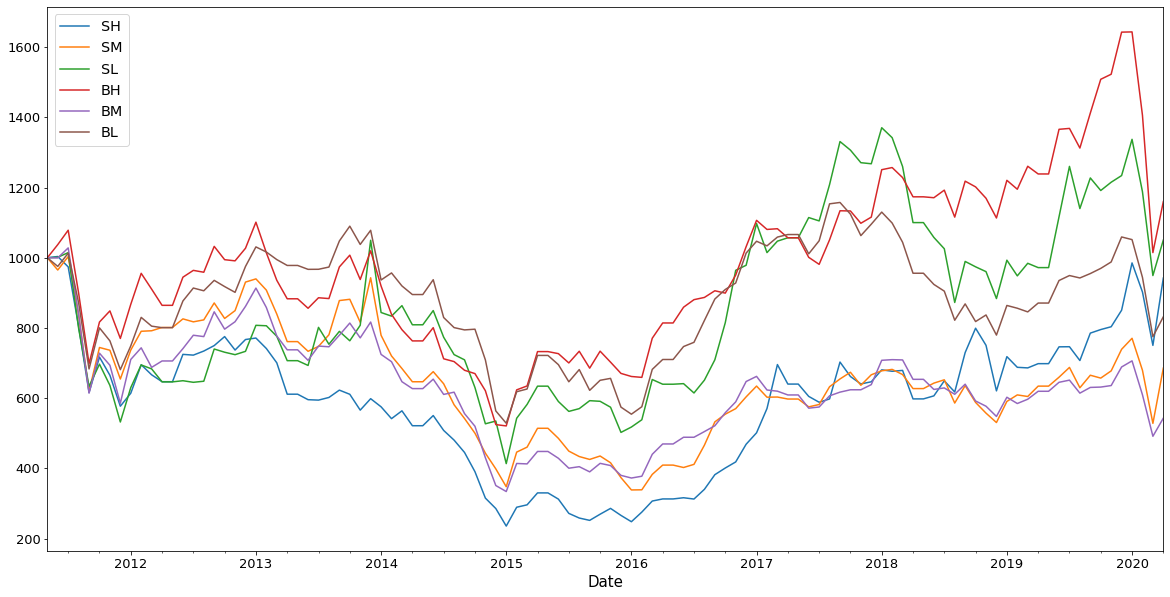

In [169]:
factors.plot(x='Date', y=['SH', 'SM', 'SL', 'BH', 'BM', 'BL'], figsize=(20, 10))
plt.legend(fontsize=20)
plt.legend(fontsize="x-large")
#plt.title('Динамика рыночных стоимостей портфелей в России', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.savefig('3FF(3x2) Russia.png')

In [170]:
factors['SH%'] = factors['SH'].pct_change() * 100
factors['SM%'] = factors['SM'].pct_change() * 100
factors['SL%'] = factors['SL'].pct_change() * 100
factors['BH%'] = factors['BH'].pct_change() * 100
factors['BM%'] = factors['BM'].pct_change() * 100
factors['BL%'] = factors['BL'].pct_change() * 100

factors = factors.fillna(0)

factors

,Date,SH,SM,SL,BH,BM,BL,SH%,SM%,SL%,BH%,BM%,BL%
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000",0.000,0.000,0.000,0.000,0.000,0.000
1,2011-06-30,"1,003.609",965.109,"1,001.368","1,037.407",999.512,975.402,0.361,-3.489,0.137,3.741,-0.049,-2.460
2,2011-07-31,974.068,"1,003.335","1,014.553","1,078.442","1,028.051","1,013.030",-2.943,3.961,1.317,3.956,2.855,3.858
3,2011-08-31,804.709,836.139,799.213,899.460,839.189,871.678,-17.387,-16.664,-21.225,-16.596,-18.371,-13.953
4,2011-09-30,616.071,619.591,633.508,698.208,614.579,683.308,-23.442,-25.898,-20.734,-22.375,-26.765,-21.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128","1,642.647",688.918,"1,059.257",5.858,9.074,1.562,7.874,8.322,7.205
104,2020-01-31,985.339,770.650,"1,337.335","1,643.295",706.347,"1,051.737",15.841,4.238,8.363,0.039,2.530,-0.710
105,2020-02-29,902.487,679.449,"1,187.999","1,405.753",609.666,944.037,-8.408,-11.834,-11.167,-14.455,-13.687,-10.240
106,2020-03-31,750.427,528.333,949.343,"1,014.727",491.542,775.080,-16.849,-22.241,-20.089,-27.816,-19.375,-17.897


In [171]:
factors['SMB'] = 1/3 * (factors['SH%'] + factors['SM%'] + factors['SL%']) - 1/3 * (factors['BH%'] + factors['BM%'] + factors['BL%'])
factors['HML'] = 1/2 * (factors['SH%'] + factors['BH%']) - 1/2 * (factors['SL%'] + factors['BL%'])

factors

,Date,SH,SM,SL,BH,BM,BL,SH%,SM%,SL%,BH%,BM%,BL%,SMB,HML
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2011-06-30,"1,003.609",965.109,"1,001.368","1,037.407",999.512,975.402,0.361,-3.489,0.137,3.741,-0.049,-2.460,-1.408,3.212
2,2011-07-31,974.068,"1,003.335","1,014.553","1,078.442","1,028.051","1,013.030",-2.943,3.961,1.317,3.956,2.855,3.858,-2.778,-2.081
3,2011-08-31,804.709,836.139,799.213,899.460,839.189,871.678,-17.387,-16.664,-21.225,-16.596,-18.371,-13.953,-2.118,0.598
4,2011-09-30,616.071,619.591,633.508,698.208,614.579,683.308,-23.442,-25.898,-20.734,-22.375,-26.765,-21.610,0.225,-1.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128","1,642.647",688.918,"1,059.257",5.858,9.074,1.562,7.874,8.322,7.205,-2.302,2.482
104,2020-01-31,985.339,770.650,"1,337.335","1,643.295",706.347,"1,051.737",15.841,4.238,8.363,0.039,2.530,-0.710,8.861,4.114
105,2020-02-29,902.487,679.449,"1,187.999","1,405.753",609.666,944.037,-8.408,-11.834,-11.167,-14.455,-13.687,-10.240,2.325,-0.728
106,2020-03-31,750.427,528.333,949.343,"1,014.727",491.542,775.080,-16.849,-22.241,-20.089,-27.816,-19.375,-17.897,1.970,-3.339


In [172]:
# factors.to_excel('3FF (3x2) factors USA.xlsx')

In [173]:
# Подтягиваем рыночную премию за риск

premium = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Market Factor Russia', header=0)
premium['Date'] = pd.to_datetime(premium['Date'], dayfirst=True)
premium

,Date,Risk Free Rate,Market Return,Market Premium
0,2010-02-28,2.575,-4.272,-6.847
1,2010-03-31,3.014,11.456,8.443
2,2010-04-30,0.128,0.023,-0.106
3,2010-05-31,-5.140,-11.969,-6.829
4,2010-06-30,-0.949,-3.267,-2.319
...,...,...,...,...
126,2020-08-31,-0.453,1.957,2.411
127,2020-09-30,-5.849,-6.363,-0.515
128,2020-10-31,-3.663,-9.496,-5.832
129,2020-11-30,8.053,20.192,12.140


In [174]:
factors.columns.values

array(['Date', 'SH', 'SM', 'SL', 'BH', 'BM', 'BL', 'SH%', 'SM%', 'SL%',
       'BH%', 'BM%', 'BL%', 'SMB', 'HML'], dtype=object)

In [175]:
model = pd.merge(factors[['Date', 'SH%', 'SM%', 'SL%', 'BH%', 'BM%', 'BL%', 'SMB', 'HML']],
                      premium[['Date', 'Market Premium', 'Risk Free Rate']], how='inner', on='Date')
model = model.rename(columns={'Market Premium': 'MP',
                             'SH%': 'SH',
                             'SM%': 'SM',
                             'SL%': 'SL',
                             'BH%': 'BH',
                             'BM%': 'BM',
                             'BL%': 'BL'})
model

,Date,SH,SM,SL,BH,BM,BL,SMB,HML,MP,Risk Free Rate
0,2011-05-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-4.983,-1.842
1,2011-06-30,0.361,-3.489,0.137,3.741,-0.049,-2.460,-1.408,3.212,0.386,0.573
2,2011-07-31,-2.943,3.961,1.317,3.956,2.855,3.858,-2.778,-2.081,-0.812,3.870
3,2011-08-31,-17.387,-16.664,-21.225,-16.596,-18.371,-13.953,-2.118,0.598,-7.999,-5.372
4,2011-09-30,-23.442,-25.898,-20.734,-22.375,-26.765,-21.610,0.225,-1.736,-9.225,-11.993
...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,5.858,9.074,1.562,7.874,8.322,7.205,-2.302,2.482,2.651,5.028
104,2020-01-31,15.841,4.238,8.363,0.039,2.530,-0.710,8.861,4.114,-4.219,2.163
105,2020-02-29,-8.408,-11.834,-11.167,-14.455,-13.687,-10.240,2.325,-0.728,-10.101,-4.228
106,2020-03-31,-16.849,-22.241,-20.089,-27.816,-19.375,-17.897,1.970,-3.339,-4.423,-17.524


In [176]:
# построение исходного портфеля

#all_p = data[['Date', 'RIC']]
#all_p

In [177]:
"""start_date = pd.to_datetime('31.05.2011', dayfirst=True)
portfolio = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])
    del portfolio_part['Date_x']
    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})
    portfolio = portfolio.append(portfolio_part)"""

"start_date = pd.to_datetime('31.05.2011', dayfirst=True)\nportfolio = pd.DataFrame()\n\nfor i in range(10):\n    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &\n           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]\n    \n    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])\n    del portfolio_part['Date_x']\n    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})\n    portfolio = portfolio.append(portfolio_part)"

In [178]:
#portfolio_result = build_portfolio(portfolio)

In [179]:
"""portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100
portfolio_result = portfolio_result.fillna(0)
portfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')
portfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']
portfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})
portfolio_result"""

"portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100\nportfolio_result = portfolio_result.fillna(0)\nportfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')\nportfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']\nportfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})\nportfolio_result"

In [180]:
# 3FF

pd.options.display.float_format = '{:,.3f}'.format

def FF3_OLS(p):
    X = model[['MP', 'SMB', 'HML']].values
    X = sm.add_constant(X)
    Y = np.array(p-model['Risk Free Rate'])

    regr = sm.OLS(Y, X).fit()

    result = {'portfolio': [p.name, 'p-value'],
              'alpha': [regr.params[0], regr.pvalues[0]],
              'MP': [regr.params[1], regr.pvalues[1]],
              'SMB': [regr.params[2], regr.pvalues[2]],
              'HML': [regr.params[3], regr.pvalues[3]],
              'rsquared': [regr.rsquared, regr.rsquared]}
    
    result = pd.DataFrame(data=result)
    return result

In [181]:
FF3 = pd.DataFrame()

FF3 = FF3.append(FF3_OLS(model['SH']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['SM']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['SL']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['BH']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['BM']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['BL']), ignore_index=True)

FF3 = FF3.append(FF3_OLS(model['MP']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['SMB']), ignore_index=True)
FF3 = FF3.append(FF3_OLS(model['HML']), ignore_index=True)

FF3

,portfolio,alpha,MP,SMB,HML,rsquared
0,SH,0.391,0.674,1.047,0.706,0.704
1,p-value,0.267,0.000,0.000,0.000,0.704
2,SM,0.151,0.881,0.653,-0.085,0.508
3,p-value,0.725,0.000,0.000,0.424,0.508
4,SL,0.626,0.880,1.118,-0.885,0.736
5,p-value,0.111,0.000,0.000,0.000,0.736
6,BH,0.696,0.863,-0.053,0.146,0.559
7,p-value,0.057,0.000,0.555,0.105,0.559
8,BM,0.013,0.913,-0.004,-0.147,0.551
9,p-value,0.974,0.000,0.968,0.122,0.551


In [182]:
FF3.to_excel('New Models\FF3 (2x3) Russia.xlsx')